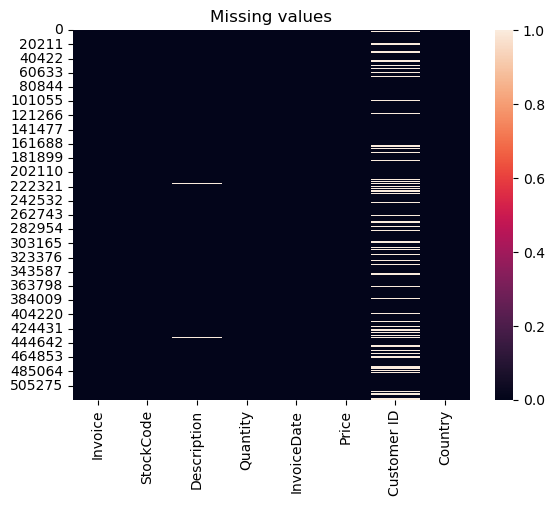

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
dataset=pd.read_csv(r"D:\Downloads\archive\Year 2009-2010.csv",encoding="unicode_escape")
sns.heatmap(dataset.isnull())
plt.title("Missing values")
plt.show()

In [9]:
dataset.drop(columns=["Customer ID"],inplace=True)
dataset["Description"]=dataset["Description"].fillna(dataset["Description"].mode()[0])
dataset.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Country        0
dtype: int64

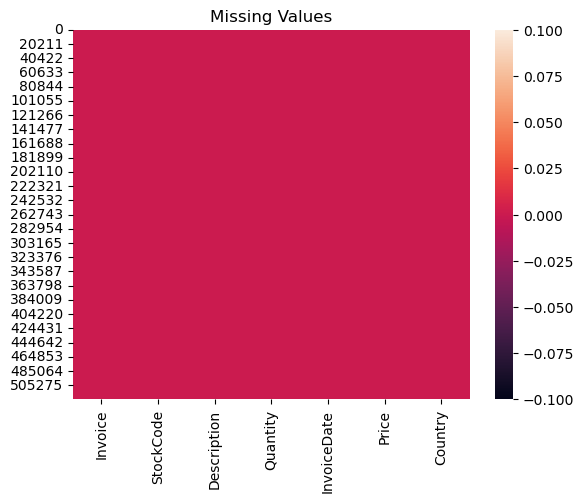

In [10]:
sns.heatmap(dataset.isnull())
plt.title("Missing Values")
plt.show()

In [11]:
dataset.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,12/1/2009 7:45,6.95,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,12/1/2009 7:45,6.75,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,12/1/2009 7:45,6.75,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,12/1/2009 7:45,2.10,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,12/1/2009 7:45,1.25,United Kingdom


In [12]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
dataset["Description"]=le.fit_transform(dataset["Description"])

In [14]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
dataset["Country"]=oe.fit_transform(dataset[["Country"]])

In [15]:
dataset.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Country
0,489434,85048,55,12,12/1/2009 7:45,6.95,37.0
1,489434,79323P,2920,12,12/1/2009 7:45,6.75,37.0
2,489434,79323W,27,12,12/1/2009 7:45,6.75,37.0
3,489434,22041,3236,48,12/1/2009 7:45,2.10,37.0
4,489434,21232,4067,24,12/1/2009 7:45,1.25,37.0


In [16]:
dataset["InvoiceDate"] = pd.to_datetime(dataset["InvoiceDate"])
dataset.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Country
0,489434,85048,55,12,2009-12-01 07:45:00,6.95,37.0
1,489434,79323P,2920,12,2009-12-01 07:45:00,6.75,37.0
2,489434,79323W,27,12,2009-12-01 07:45:00,6.75,37.0
3,489434,22041,3236,48,2009-12-01 07:45:00,2.10,37.0
4,489434,21232,4067,24,2009-12-01 07:45:00,1.25,37.0


In [17]:
dataset.describe()

,Description,Quantity,InvoiceDate,Price,Country
count,525461.000000,525461.000000,525461,525461.000000,525461.000000
mean,2438.835453,10.337667,2010-06-28 11:37:36.845017856,4.688834,35.352631
min,0.000000,-9600.000000,2009-12-01 07:45:00,-53594.360000,0.000000
25%,1342.000000,1.000000,2010-03-21 12:20:00,1.250000,37.000000
50%,2419.000000,3.000000,2010-07-06 09:51:00,2.100000,37.000000
75%,3508.000000,10.000000,2010-10-15 12:45:00,4.210000,37.000000
max,4680.000000,19152.000000,2010-12-09 20:01:00,25111.090000,39.000000
std,1306.152365,107.424110,NaN,146.126914,6.232506


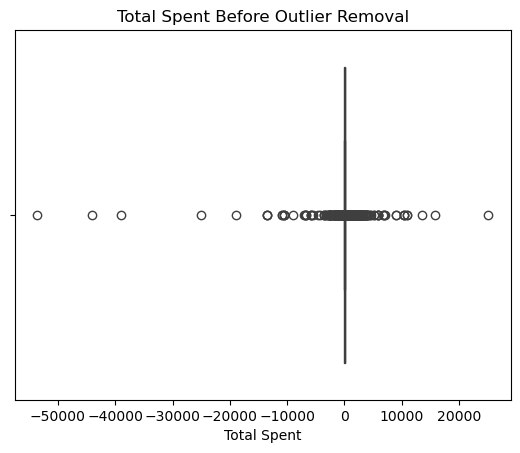

In [18]:
dataset["Total Spent"] = dataset["Quantity"] * dataset["Price"]
sns.boxplot(x=dataset["Total Spent"])
plt.title("Total Spent Before Outlier Removal")
plt.show()

In [19]:
q1=dataset["Total Spent"].quantile(0.25)
q3=dataset["Total Spent"].quantile(0.75)
IQR=q3-q1
min_range=q1-(IQR*1.5)
max_range=q3+(IQR*1.5)
dataset=dataset[(dataset["Total Spent"]>=min_range) & (dataset["Total Spent"]<=max_range)]

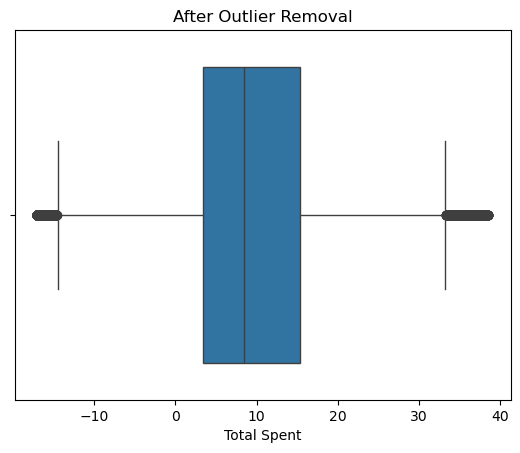

In [20]:
sns.boxplot(x=dataset["Total Spent"])
plt.title("After Outlier Removal")
plt.show()

In [21]:
dataset.describe()

,Description,Quantity,InvoiceDate,Price,Country,Total Spent
count,479589.000000,479589.000000,479589,479589.000000,479589.000000,479589.000000
mean,2439.904935,5.555684,2010-06-28 13:27:14.930659328,3.253834,35.524115,10.329650
min,0.000000,-9600.000000,2009-12-01 07:45:00,0.000000,0.000000,-17.000000
25%,1361.000000,1.000000,2010-03-21 11:32:00,1.250000,37.000000,3.360000
50%,2421.000000,3.000000,2010-07-05 17:28:00,2.100000,37.000000,8.470000
75%,3529.000000,8.000000,2010-10-15 16:00:00,4.210000,37.000000,15.300000
max,4680.000000,10200.000000,2010-12-09 20:01:00,38.510000,39.000000,38.550000
std,1306.794392,61.165984,NaN,3.380335,5.947741,8.559711


In [25]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
scaler_columns=["Quantity","Price","Total Spent"]
dataset[scaler_columns]=ss.fit_transform(dataset[scaler_columns])

C:\Users\MANYA SHARMA\anaconda3\envs\datascience_env\lib\site-packages\pandas\core\internals\blocks.py:395: RuntimeWarning: invalid value encountered in log1p
  result = func(self.values, **kwargs)
C:\Users\MANYA SHARMA\AppData\Local\Temp\ipykernel_3412\3975442228.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["Total Spent Transformed"])


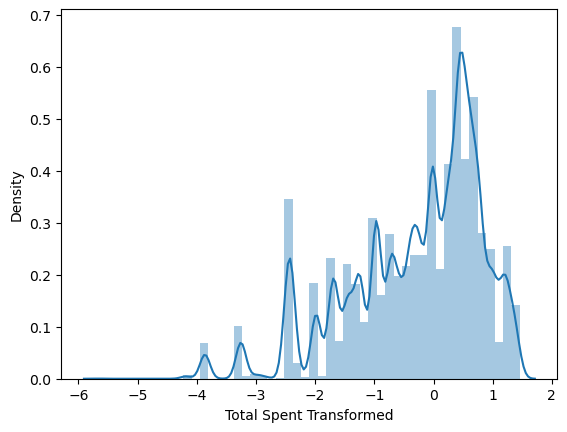

In [27]:
import numpy as np
from sklearn.preprocessing import FunctionTransformer
ft=FunctionTransformer(func=np.log1p)
dataset["Total Spent Transformed"]=ft.fit_transform(dataset[["Total Spent"]])
sns.distplot(dataset["Total Spent Transformed"])
plt.show()

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
dataset.dropna(subset=["Total Spent Transformed"], inplace=True)
X = dataset[['Description', 'Quantity', 'Price', 'Country']]
y = dataset['Total Spent Transformed']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Linear R2 Score: 0.319843089096733


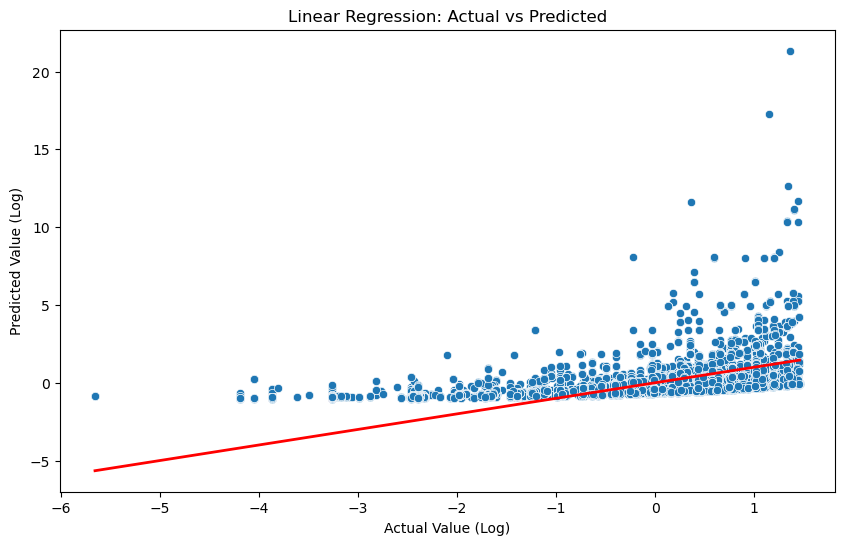

In [35]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print(f"Linear R2 Score: {lr.score(X_test, y_test)}")

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_lr)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.title("Linear Regression: Actual vs Predicted")
plt.xlabel("Actual Value (Log)")
plt.ylabel("Predicted Value (Log)")
plt.show()

Polynomial R2 Score: 0.772999047516443


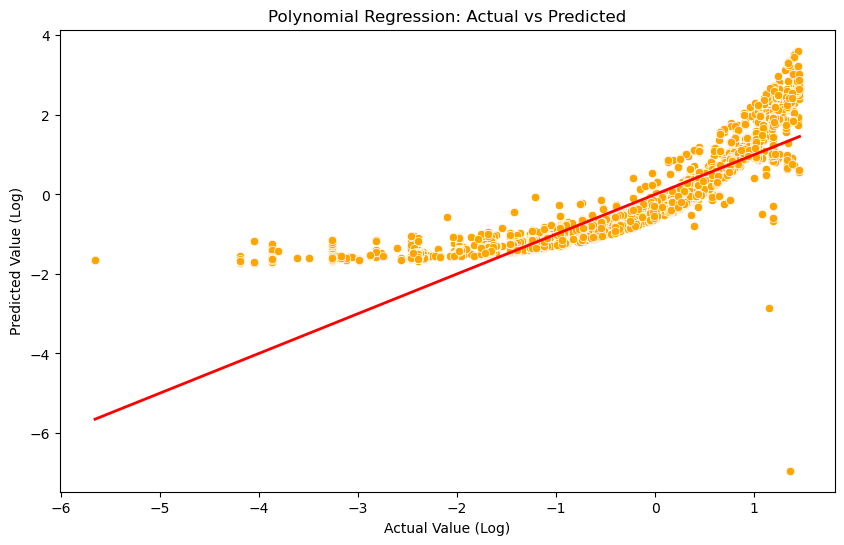

In [36]:
poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

poly_reg = LinearRegression()
poly_reg.fit(X_poly_train, y_train)
y_pred_poly = poly_reg.predict(X_poly_test)

print(f"Polynomial R2 Score: {poly_reg.score(X_poly_test, y_test)}")

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_poly, color='orange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.title("Polynomial Regression: Actual vs Predicted")
plt.xlabel("Actual Value (Log)")
plt.ylabel("Predicted Value (Log)")
plt.show()

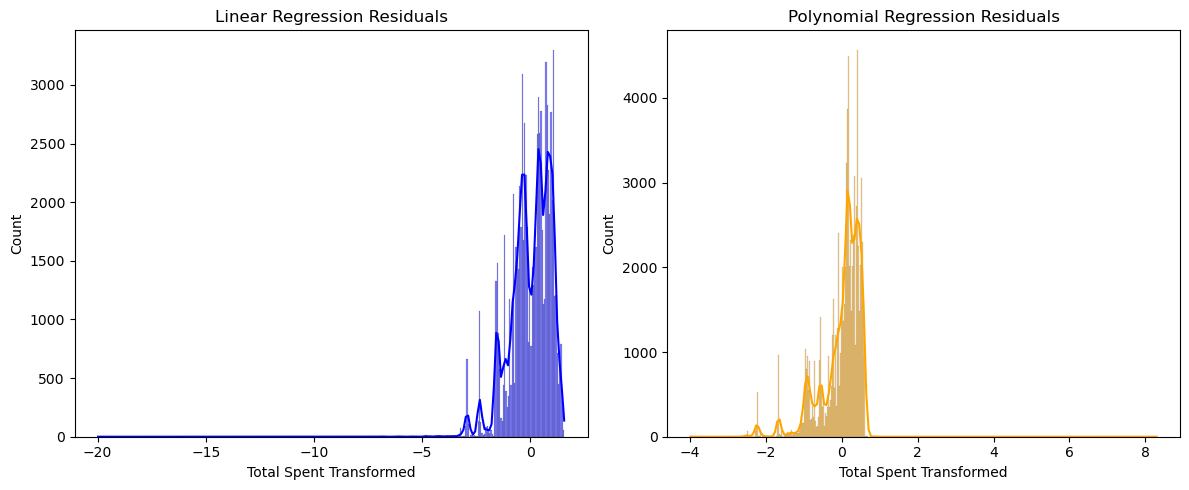

In [37]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(y_test - y_pred_lr, kde=True, color='blue')
plt.title("Linear Regression Residuals")

plt.subplot(1, 2, 2)
sns.histplot(y_test - y_pred_poly, kde=True, color='orange')
plt.title("Polynomial Regression Residuals")

plt.tight_layout()
plt.show()